> # ARIMA

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/rifkaah/Desktop/college/SEMESTER 4/Metoper/paper lstm/Data Historis ICBP terbaru.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())

      Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah   Vol. Perubahan%
0  18/06/2025    10.650     10.600     10.675    10.550  3,00M      0,24%
1  17/06/2025    10.625     10.575     10.725    10.575  2,44M      0,47%
2  16/06/2025    10.575     10.600     10.750    10.550  3,56M     -0,24%
3  13/06/2025    10.600     10.675     10.725    10.550  4,30M     -0,70%
4  12/06/2025    10.675     10.700     10.825    10.600  4,17M     -0,23%


In [ ]:
data['Tanggal'] = pd.to_datetime(data['Tanggal'], format='%d/%m/%Y')
print(data.head())

     Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah   Vol. Perubahan%
0 2025-06-18    10.650     10.600     10.675    10.550  3,00M      0,24%
1 2025-06-17    10.625     10.575     10.725    10.575  2,44M      0,47%
2 2025-06-16    10.575     10.600     10.750    10.550  3,56M     -0,24%
3 2025-06-13    10.600     10.675     10.725    10.550  4,30M     -0,70%
4 2025-06-12    10.675     10.700     10.825    10.600  4,17M     -0,23%


In [ ]:
sorted_data = data.sort_values(by='Tanggal', ascending=True)
print(sorted_data)

        Tanggal  Terakhir  Pembukaan  Tertinggi  Terendah     Vol. Perubahan%
2411 2015-06-18     6.575      6.450      6.575     6.450    1,99M      1,94%
2410 2015-06-19     6.475      6.575      6.650     6.450    4,05M     -1,52%
2409 2015-06-22     6.488      6.475      6.525     6.438  859,40K      0,20%
2408 2015-06-23     6.450      6.538      6.625     6.450    2,53M     -0,59%
2407 2015-06-24     6.425      6.500      6.525     6.400    1,68M     -0,39%
...         ...       ...        ...        ...       ...      ...        ...
4    2025-06-12    10.675     10.700     10.825    10.600    4,17M     -0,23%
3    2025-06-13    10.600     10.675     10.725    10.550    4,30M     -0,70%
2    2025-06-16    10.575     10.600     10.750    10.550    3,56M     -0,24%
1    2025-06-17    10.625     10.575     10.725    10.575    2,44M      0,47%
0    2025-06-18    10.650     10.600     10.675    10.550    3,00M      0,24%

[2412 rows x 7 columns]


In [ ]:
selected_data = sorted_data[['Tanggal', 'Terakhir']]
print(selected_data.head())

        Tanggal  Terakhir
2411 2015-06-18     6.575
2410 2015-06-19     6.475
2409 2015-06-22     6.488
2408 2015-06-23     6.450
2407 2015-06-24     6.425


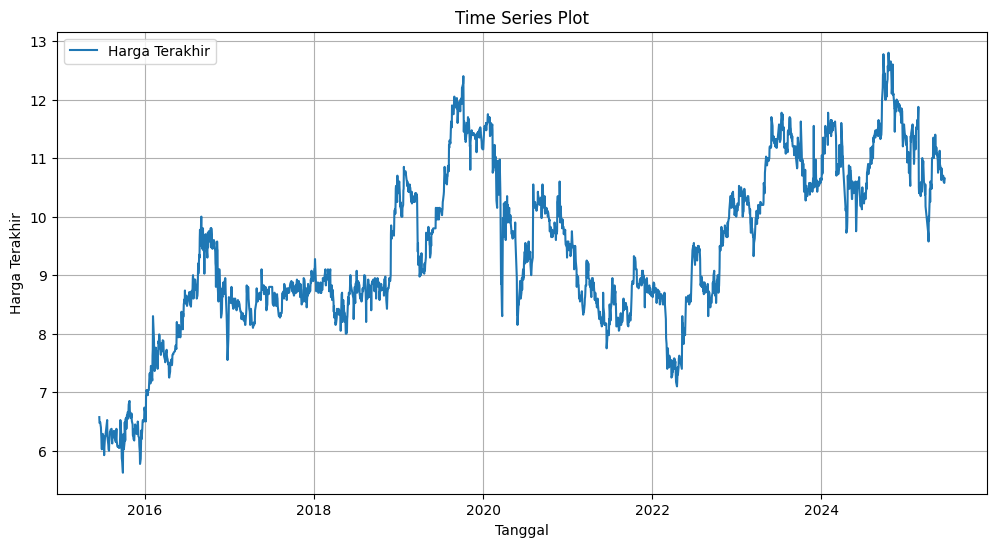

In [ ]:
import matplotlib.pyplot as plt

# Plot time series
plt.figure(figsize=(12, 6))
plt.plot(selected_data['Tanggal'], selected_data['Terakhir'], label='Harga Terakhir')
plt.title('Time Series Plot')
plt.xlabel('Tanggal')
plt.ylabel('Harga Terakhir')
plt.legend()
plt.grid()
plt.show()

> # ARIMA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fungsi untuk MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [ ]:

# -------------------------------
# 1. Ambil data
# -------------------------------
selected_data1 = selected_data.copy()
selected_data1['Terakhir'] = pd.to_numeric(selected_data1['Terakhir'], errors='coerce')
selected_data1.dropna(inplace=True)
selected_data1.set_index('Tanggal', inplace=True)


In [ ]:
# -------------------------------
# 2. Split data
# -------------------------------
train_size = int(len(selected_data1) * 0.8)
train = selected_data1.iloc[:train_size]
test = selected_data1.iloc[train_size:]


In [ ]:
# -------------------------------
# 3. ADF Test untuk train
# -------------------------------
result = adfuller(train['Terakhir'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:", result[4])
if result[1] <= 0.05:
    print("The training data is stationary.")
else:
    print("The training data is NOT stationary. Proceed to differencing...")


ADF Statistic: -2.201807866549208
p-value: 0.2055899600422471
Critical Values: {'1%': -3.4337622297208146, '5%': -2.863047304445204, '10%': -2.567572430319552}
The training data is NOT stationary. Proceed to differencing...


ADF Statistic (diff 1): -16.956568830618295
p-value (diff 1): 9.375957730636703e-30
Critical Values (diff 1): {'1%': -3.4337622297208146, '5%': -2.863047304445204, '10%': -2.567572430319552}
Differenced data is stationary.


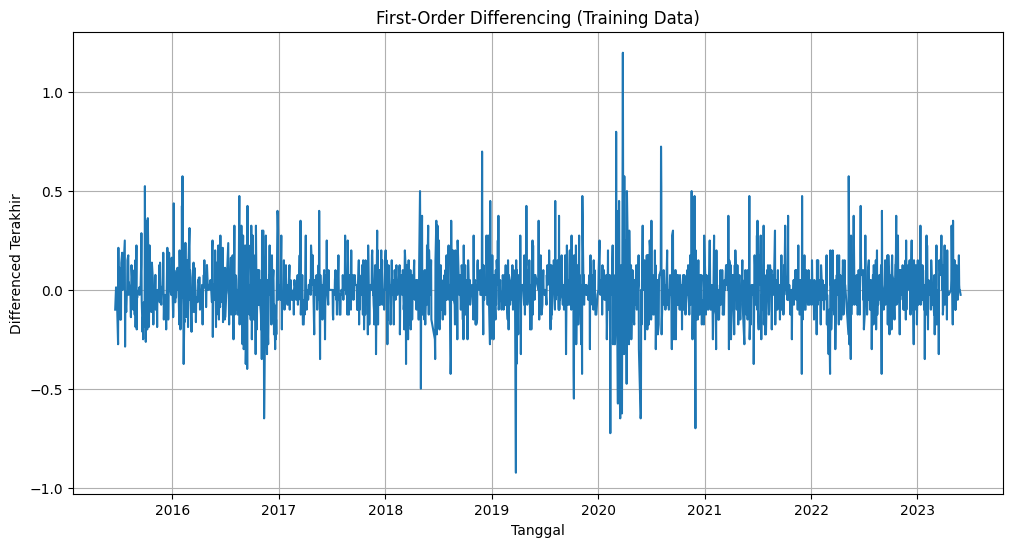

In [ ]:
# -------------------------------
# 4. Differencing (jika diperlukan)
# -------------------------------
data_diff1 = train['Terakhir'].diff().dropna()
result_diff1 = adfuller(data_diff1)
print("ADF Statistic (diff 1):", result_diff1[0])
print("p-value (diff 1):", result_diff1[1])
print("Critical Values (diff 1):", result_diff1[4])
if result_diff1[1] <= 0.05:
    print("Differenced data is stationary.")
else:
    print("Still not stationary. Consider higher differencing.")

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(data_diff1)
plt.title('First-Order Differencing (Training Data)')
plt.xlabel('Tanggal')
plt.ylabel('Differenced Terakhir')
plt.grid()
plt.show()


<Figure size 1000x500 with 0 Axes>

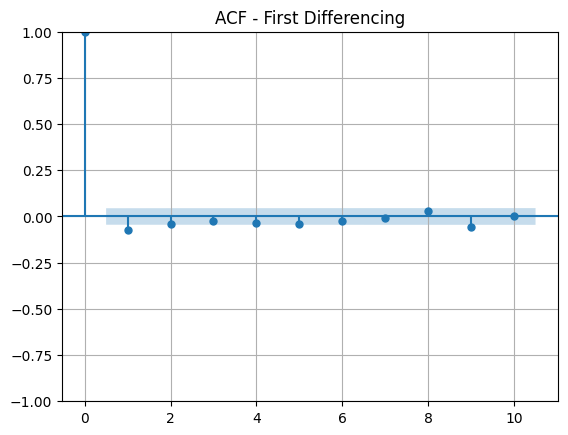

<Figure size 1000x500 with 0 Axes>

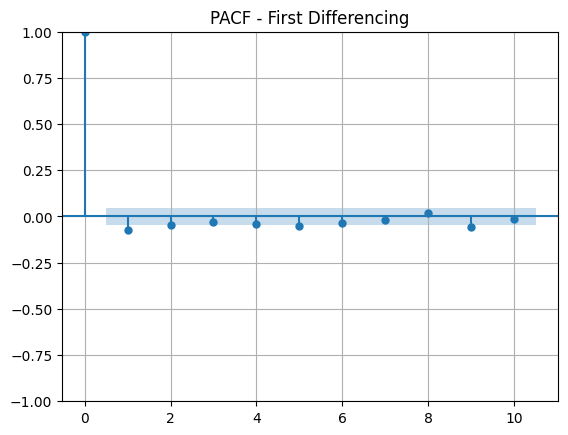

In [ ]:
# -------------------------------
# 5. Plot ACF dan PACF dari differenced training data
# -------------------------------
plt.figure(figsize=(10, 5))
plot_acf(data_diff1, lags=10, alpha=0.05)
plt.title('ACF - First Differencing')
plt.grid()
plt.show()

plt.figure(figsize=(10, 5))
plot_pacf(data_diff1, lags=10, alpha=0.05)
plt.title('PACF - First Differencing')
plt.grid()
plt.show()

In [ ]:
# -------------------------------
# 6. Fit Auto ARIMA hanya pada training
# -------------------------------
model = auto_arima(train['Terakhir'],
                   start_p=1, start_q=1,
                   max_p=4, max_q=4,
                   d=1,
                   seasonal=False,
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True)

print(model.summary())


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1769.878, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1746.483, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1755.588, Time=0.07 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1756.741, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1748.018, Time=0.07 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-1767.916, Time=0.94 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1759.260, Time=0.86 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1759.401, Time=0.19 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-1757.928, Time=0.11 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1765.940, Time=1.34 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1770.927, Time=0.19 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1758.181, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1757.045, Time=0.08 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-1768.964, Time=0.21 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1760.770, Time=0.15 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-1759.330, Time=0.10 sec


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-1766.988, Time=0.21 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0]          
Total fit time: 5.781 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1929
Model:               SARIMAX(1, 1, 1)   Log Likelihood                 888.464
Date:                Thu, 19 Jun 2025   AIC                          -1770.927
Time:                        00:48:28   BIC                          -1754.235
Sample:                             0   HQIC                         -1764.787
                               - 1929                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7096      0.059     12.103      0.000       0.595

In [ ]:

# -------------------------------
# 7. Forecast ke test set
# -------------------------------
n_periods = len(test)
forecast = model.predict(n_periods=n_periods)
forecast_index = test.index


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


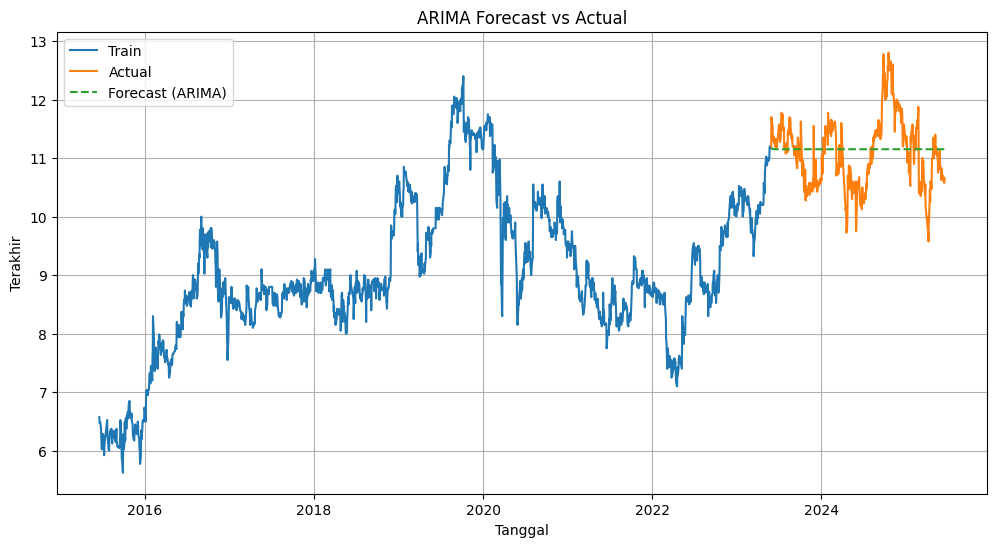

In [ ]:
# -------------------------------
# 8. Plot Forecast vs Test
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Terakhir'], label='Train')
plt.plot(test.index, test['Terakhir'], label='Actual')
plt.plot(forecast_index, forecast, label='Forecast (ARIMA)', linestyle='--')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Tanggal')
plt.ylabel('Terakhir')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# -------------------------------
# 9. Evaluasi model
# -------------------------------
mae = mean_absolute_error(test['Terakhir'], forecast)
mse = mean_squared_error(test['Terakhir'], forecast)
rmse = np.sqrt(mean_squared_error(test['Terakhir'], forecast))
mape = mean_absolute_percentage_error(test['Terakhir'], forecast)

print(f"[Evaluasi ARIMA]")
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")

[Evaluasi ARIMA]
MAE  : 0.4721
MSE  : 0.3470
RMSE : 0.5891
MAPE : 4.26%


> # LSTM

#### Metode Deep Learning merupakan salah satu subset Machine Learning yang menggunakan algoritma kompleks. Deep learning dapat digunakan untuk pemodelan data sekuensial yang memiliki dependensi, misalnya data kalimat teks maupun time series,dengan mengadopsi algoritma Recurrent Neural Network (RNN) maupun jaringan Long-Short Term Memory (LSTM). LSTM dirancang dan dikembangkan oleh S. Hochreiter dan J. Schmidhuber. Keduanya membuat LSTM dengan tujuan untuk mengatasi dependensi jangka panjang RNN, yaitu ketika RNN tidak mampu memperkirakan kata yang disimpan dalam memori jangka panjang, namun bisa memberikan prediksi yang lebih akurat dari informasi terbaru. Pada kasus data time series, barisan yang digunakan biasanya panjang dan memiliki memori yang panjang sehingga LSTM dapat digunakan untuk melakukan peramalan atau prediksi bagi data time series.

In [ ]:
data_lstm = selected_data.copy()

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
data_lstm.head()

,Tanggal,Terakhir
2411,2015-06-18,6.575
2410,2015-06-19,6.475
2409,2015-06-22,6.488
2408,2015-06-23,6.450
2407,2015-06-24,6.425


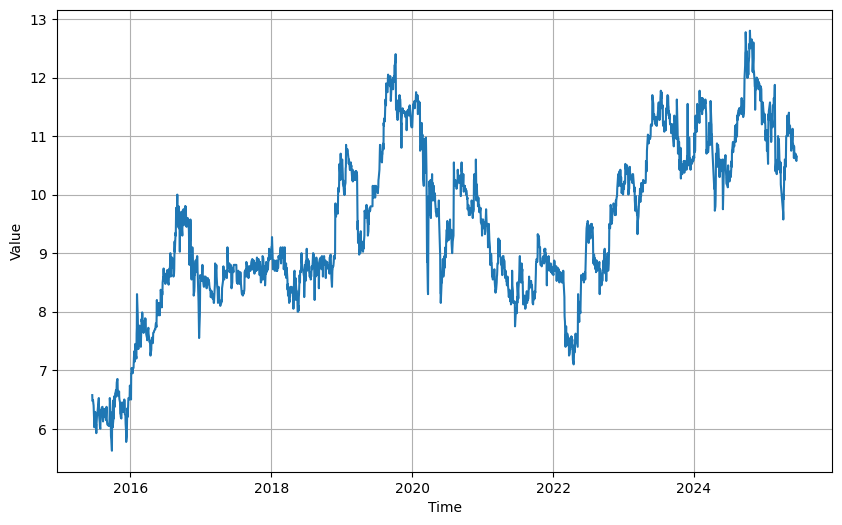

In [ ]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

plt.figure(figsize=(10, 6))
plot_series(data_lstm['Tanggal'], data_lstm['Terakhir'])
plt.show()

In [ ]:
# load the dataset
dataframe = data_lstm[['Terakhir']]
dataset = dataframe.values
dataset = dataset.astype('float32')
dataset.shape

(2412, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [ ]:
dataset

array([[0.13240415],
       [0.11846691],
       [0.12027872],
       ...,
       [0.6898955 ],
       [0.6968641 ],
       [0.7003484 ]], dtype=float32)

In [ ]:
# 3. Split train-test 80 : 20
look_back = 5
train_size = int(len(dataset) * 0.80)                  # 1 800 baris
train, test = dataset[:train_size], dataset[train_size:]

In [ ]:
# 4. Helper: ubah jadi [X, y] ber-window look_back
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i : i + look_back, 0])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

trainX, trainY = create_dataset(train, look_back)
testX,  testY  = create_dataset(test,  look_back)


In [ ]:
# 5. Bentuk ulang ke 3-D: [samples, timesteps, features]
trainX = trainX.reshape((trainX.shape[0], look_back, 1))
testX  = testX.reshape((testX.shape[0],  look_back, 1))

print("trainX shape:", trainX.shape)
print("testX  shape:", testX.shape)

trainX shape: (1924, 5, 1)
testX  shape: (478, 5, 1)


In [ ]:
# -------------------- MODEL --------------------
look_back = 5  # harus sama dengan sebelumnya
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(look_back, 1)),
    tf.keras.layers.Conv1D(32, kernel_size=5, padding="causal", activation="relu"),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

early_stop = tf.keras.callbacks.EarlyStopping(
    patience=10,  # hentikan bila val_loss tidak membaik 10 epoch
    restore_best_weights=True
)

history = model.fit(
    trainX, trainY,
    epochs=50,
    batch_size=32,
    validation_split=0.1,      # 10 % data train jadi validation
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0924 - mae: 0.2370 - val_loss: 0.0055 - val_mae: 0.0635
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0037 - mae: 0.0452 - val_loss: 8.0391e-04 - val_mae: 0.0209
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - mae: 0.0243 - val_loss: 7.8037e-04 - val_mae: 0.0208
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0242 - val_loss: 7.4430e-04 - val_mae: 0.0206
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0014 - mae: 0.0258 - val_loss: 9.8203e-04 - val_mae: 0.0245
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0251 - val_loss: 7.9164e-04 - val_mae: 0.0211
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0013 - mae: 0.0255 - val_loss: 7.9763e-04 - val_mae: 0.0222
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0012 - mae: 0.0237 - val_loss: 0.0011 - val_mae: 0.0269
Epoch 9/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [ ]:
# -------------------- PREDICTION --------------------
train_pred = model.predict(trainX, verbose=0)
test_pred  = model.predict(testX,  verbose=0)

# Inverse scaling
train_pred_inv = scaler.inverse_transform(train_pred)
test_pred_inv  = scaler.inverse_transform(test_pred)

trainY_inv = scaler.inverse_transform(trainY.reshape(-1, 1)).flatten()
testY_inv  = scaler.inverse_transform(testY.reshape(-1, 1)).flatten()


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  # ← tambahkan / jalankan dulu


In [ ]:
# -------------------- METRICS --------------------
def compute_metrics(true, pred):
    mse = mean_squared_error(true, pred)
    mae = mean_absolute_error(true, pred)
    return mse, mae

mse, mae = compute_metrics(testY_inv, test_pred_inv.flatten())
print(f"Final test - MSE: {mse:.2f}  |  MAE: {mae:.2f}")

Final test - MSE: 0.04  |  MAE: 0.14


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Fungsi untuk menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Hitung metrik
mae = mean_absolute_error(testY_inv, test_pred_inv.flatten())
mse = mean_squared_error(testY_inv, test_pred_inv.flatten())
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(testY_inv, test_pred_inv.flatten())

# Cetak hasil
print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"MAPE : {mape:.2f}%")

MAE  : 0.1393
MSE  : 0.0378
RMSE : 0.1943
MAPE : 1.26%


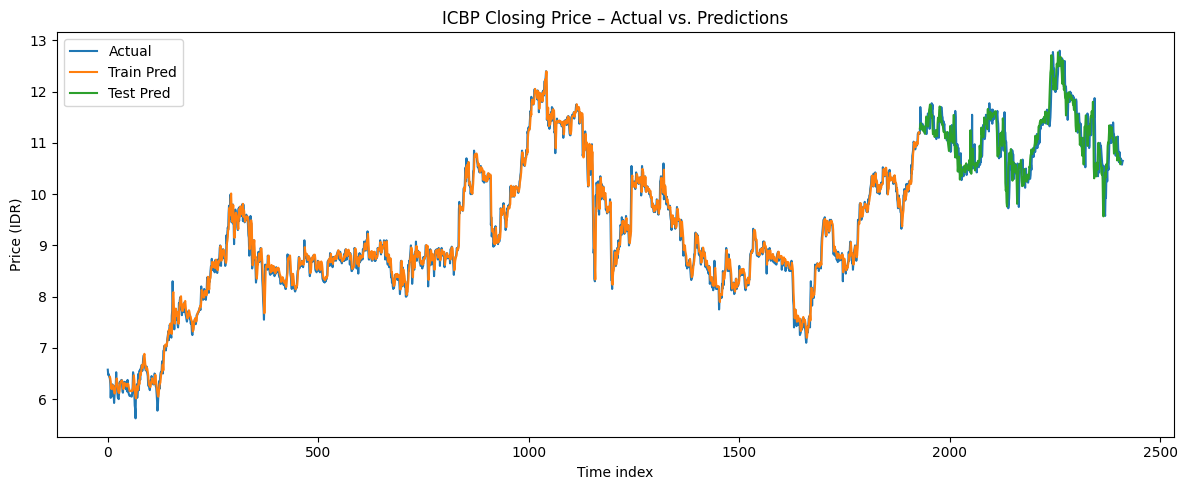

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------- SHIFT PREDICTIONS --------------------
trainPredictPlot = np.full_like(dataset, np.nan)     # array kosong (NaN) sebesar data
testPredictPlot  = np.full_like(dataset, np.nan)

# posisi prediksi TRAIN dimulai setelah window look_back
trainPredictPlot[look_back : look_back + train_pred_inv.shape[0], 0] = train_pred_inv[:, 0]

# posisi prediksi TEST dimulai setelah akhir data train + look_back
test_start = look_back + train_pred_inv.shape[0]
testPredictPlot[test_start : test_start + test_pred_inv.shape[0], 0] = test_pred_inv[:, 0]

# -------------------- PLOT --------------------
plt.figure(figsize=(12, 5))
plt.plot(scaler.inverse_transform(dataset), label="Actual")
plt.plot(trainPredictPlot, label="Train Pred")
plt.plot(testPredictPlot,  label="Test Pred")
plt.title("ICBP Closing Price – Actual vs. Predictions")
plt.xlabel("Time index")
plt.ylabel("Price (IDR)")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
def forecast(model, last_window, scaler, look_back, n_steps):
    """
    Parameters
    ----------
    model        : model Keras terlatih
    last_window  : array 1-D berisi `look_back` nilai TER‐NORMALISASI terakhir
    scaler       : objek MinMaxScaler yang dipakai sebelumnya
    look_back    : panjang window (timesteps)
    n_steps      : berapa langkah ke depan yang ingin diprediksi

    Returns
    -------
    preds_inv    : ndarray, harga yang sudah di-inverse-transform ke rupiah
    """
    preds_inv = []
    # Bentuk ke [1, timesteps, features]
    input_seq = last_window.reshape(1, look_back, 1)

    for _ in range(n_steps):
        # 1. Prediksi langkah berikut (masih skala 0-1)
        yhat_scaled = model.predict(input_seq, verbose=0)

        # 2. Simpan versi inverse-scaled (rupiah) untuk output
        yhat_inv = scaler.inverse_transform(yhat_scaled)[0, 0]
        preds_inv.append(yhat_inv)

        # 3. Update jendela input → geser 1 langkah & tambahkan prediksi skala 0-1
        input_seq = np.concatenate(
            [input_seq[:, 1:, :], yhat_scaled.reshape(1, 1, 1)],
            axis=1
        )

    return np.array(preds_inv)


In [ ]:
n_steps = 10

# Gunakan 5 (look_back) nilai TERAKHIR dari dataset ter-normalisasi
last_window = dataset[-look_back:, 0]   # ← 1-D array panjang 5

future_prices = forecast(
    model,          # model Keras: variabel 'model'
    last_window,
    scaler,
    look_back,
    n_steps
)

print(f"Forecast {n_steps} hari ke depan (IDR):")
print(future_prices)


Forecast 10 hari ke depan (IDR):
[10.665781 10.678903 10.689407 10.701623 10.713985 10.726954 10.740237
 10.753164 10.765998 10.778657]


In [ ]:
# Forecast 10 hari ke depan (IDR)
forecast_10_days = {
    "Hari ke-1": 10.665781,
    "Hari ke-2": 10.678903,
    "Hari ke-3": 10.689407,
    "Hari ke-4": 10.701623,
    "Hari ke-5": 10.713985,
    "Hari ke-6": 10.726954,
    "Hari ke-7": 10.740237,
    "Hari ke-8": 10.753164,
    "Hari ke-9": 10.765998,
    "Hari ke-10": 10.778657,
}

# Print in a formatted way
for day, price in forecast_10_days.items():
    print(f"{day}: {price:.2f} IDR")

Hari ke-1: 10.67 IDR
Hari ke-2: 10.68 IDR
Hari ke-3: 10.69 IDR
Hari ke-4: 10.70 IDR
Hari ke-5: 10.71 IDR
Hari ke-6: 10.73 IDR
Hari ke-7: 10.74 IDR
Hari ke-8: 10.75 IDR
Hari ke-9: 10.77 IDR
Hari ke-10: 10.78 IDR


In [ ]:
import pandas as pd

# Data forecast
forecast_10_days = {
    "Hari ke-1": 10.665781,
    "Hari ke-2": 10.678903,
    "Hari ke-3": 10.689407,
    "Hari ke-4": 10.701623,
    "Hari ke-5": 10.713985,
    "Hari ke-6": 10.726954,
    "Hari ke-7": 10.740237,
    "Hari ke-8": 10.753164,
    "Hari ke-9": 10.765998,
    "Hari ke-10": 10.778657,
}

# Buat DataFrame
df_forecast = pd.DataFrame(list(forecast_10_days.items()), columns=["Hari", "Harga (IDR)"])
print(df_forecast)

         Hari  Harga (IDR)
0   Hari ke-1    10.665781
1   Hari ke-2    10.678903
2   Hari ke-3    10.689407
3   Hari ke-4    10.701623
4   Hari ke-5    10.713985
5   Hari ke-6    10.726954
6   Hari ke-7    10.740237
7   Hari ke-8    10.753164
8   Hari ke-9    10.765998
9  Hari ke-10    10.778657
